In [12]:
%matplotlib inline

from tf_unet import unet, util, image_util
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# class BaseDataProvider(object):
#     """
#     Abstract base class for DataProvider implementation. Subclasses have to
#     overwrite the `_next_data` method that load the next data and label array.
#     This implementation automatically clips the data with the given min/max and
#     normalizes the values to (0,1]. To change this behavoir the `_process_data`
#     method can be overwritten. To enable some post processing such as data
#     augmentation the `_post_process` method can be overwritten.

#     :param a_min: (optional) min value used for clipping
#     :param a_max: (optional) max value used for clipping

#     """
    
#     channels = 1
#     n_class = 2
    

#     def __init__(self, a_min=None, a_max=None):
#         self.a_min = a_min if a_min is not None else -np.inf
#         self.a_max = a_max if a_min is not None else np.inf

#     def _load_data_and_label(self):
#         data, label = self._next_data()
            
#         train_data = self._process_data(data)
#         labels = self._process_labels(label)
        
#         train_data, labels = self._post_process(train_data, labels)
        
#         nx = data.shape[1]
#         ny = data.shape[0]
	
#         return train_data.reshape(1, ny, nx, self.channels), labels.reshape(1, ny, nx, self.n_class),
    
#     def _process_labels(self, label):
#         if self.n_class == 2:
#             nx = label.shape[1]
#             ny = label.shape[0]
#             #print(label.shape)
#             labels = np.zeros((ny, nx, self.n_class), dtype=np.float32)
#             labels[..., 1] = label
#             labels[..., 0] = ~label
#             return labels
        
#         return label
    
#     def _process_data(self, data):
#         # normalization
#         data = np.clip(np.fabs(data), self.a_min, self.a_max)
#         data -= np.amin(data)
#         data /= np.amax(data)
#         return data
    
#     def _post_process(self, data, labels):
#         """
#         Post processing hook that can be used for data augmentation
        
#         :param data: the data array
#         :param labels: the label array
#         """
#         return data, labels
    
#     def __call__(self, n):
#         train_data, labels = self._load_data_and_label()
#         nx = train_data.shape[1]
#         ny = train_data.shape[2]
    
#         X = np.zeros((n, nx, ny, self.channels))
#         Y = np.zeros((n, nx, ny, self.n_class))
    
#         X[0] = train_data
#         Y[0] = labels
#         for i in range(1, n):
#             train_data, labels = self._load_data_and_label()
#             X[i] = train_data
#             Y[i] = labels
    
#         return X, Y


# class ImageDataProviderRetina(BaseDataProvider):
#     """
#     Generic data provider for images, supports gray scale and colored images.
#     Assumes that the data images and label images are stored in the same folder
#     and that the labels have a different file suffix 
#     e.g. 'train/fish_1.tif' and 'train/fish_1_mask.tif'

#     Usage:
#     data_provider = ImageDataProvider("..fishes/train/*.tif")
        
#     :param search_path: a glob search pattern to find all data and label images
#     :param a_min: (optional) min value used for clipping
#     :param a_max: (optional) max value used for clipping
#     :param data_suffix: suffix pattern for the data images. Default '.tif'
#     :param mask_suffix: suffix pattern for the label images. Default '_mask.tif'
#     :param shuffle_data: if the order of the loaded file path should be randomized. Default 'True'
#     :param channels: (optional) number of channels, default=1
#     :param n_class: (optional) number of classes, default=2
    
#     """
    
#     def __init__(self, search_path, a_min=None, a_max=None, data_suffix=".tif", mask_suffix='_mask.tif', shuffle_data=True, n_class = 2):
#         super(ImageDataProviderRetina, self).__init__(a_min, a_max)
#         self.data_suffix = data_suffix
#         self.mask_suffix = mask_suffix
#         self.file_idx = -1
#         self.shuffle_data = shuffle_data
#         self.n_class = n_class
        
#         self.data_files = self._find_data_files(search_path)
        
#         if self.shuffle_data:
#             np.random.shuffle(self.data_files)
        
#         assert len(self.data_files) > 0, "No training files"
#         print("Number of files used: %s" % len(self.data_files))
        
#         img = self._load_file(self.data_files[0])
#         #print('Shape of the first image is:')
#         #print(img.shape)
#         self.channels = 3
#         self.channels = 1 if len(img.shape) == 2 else img.shape[-1]
        
#     def _find_data_files(self, search_path):
#         all_files = glob.glob(search_path)
#         return [name for name in all_files if not self.mask_suffix in name]
    
    
#     def _load_file(self, path, dtype=np.float32):
#         return np.array(Image.open(path), dtype)
#         #return np.squeeze(cv2.imread(image_name, cv2.IMREAD_GRAYSCALE))

#     def _cylce_file(self):
#         self.file_idx += 1
#         if self.file_idx >= len(self.data_files):
#             self.file_idx = 0 
#             if self.shuffle_data:
#                 np.random.shuffle(self.data_files)
        
#     def _next_data(self):
#     	#print ("In next data")
#         self._cylce_file()
#         image_name = self.data_files[self.file_idx]
#         label_name = image_name.replace(self.data_suffix, self.mask_suffix)
        
#         img = self._load_file(image_name, np.float32)
#         label = self._load_file(label_name, np.bool)
#         #print ("Image and label shape:")
#         #print(img.shape)
#         #print(label.shape)
#         return img,label

In [5]:
# Change this
path_to_segmentation = "/home/asavari/Desktop/"

In [ ]:
#preparing data loading
#Train forlder should have corresponding images named x.TIF and x_mask.tif
data_provider = ImageDataProviderRetina( path_to_segmentation + "Retina-Segmentation/code/Train/*.tif")

In [6]:
# tf_unet.image_util.ImageDataProvider(search_path, a_min=None, a_max=None, data_suffix=u'.tif', mask_suffix=u'_mask.tif', shuffle_data=True, n_class=2)
#preparing data loading
#Train forlder should have corresponding images named x.TIF and x_mask.tif
data_provider = image_util.ImageDataProvider( path_to_segmentation + "Retina-Segmentation/code/Train/*.tif")

Number of files used: 74


In [7]:
#setup & training
net = unet.Unet(layers=3, features_root=8, channels=3, n_class=2)
trainer = unet.Trainer(net)
output_path = path_to_segmentation +  "Retina-Segmentation/code/Trained_Models/"
path = trainer.train(data_provider, output_path, training_iters=10, epochs=10)

2018-07-18 23:22:25,776 Layers 3, features 8, filter size 3x3, pool size: 2x2
2018-07-18 23:22:27,118 Removing '/home/asavari/Desktop/Retina-Segmentation/code/prediction'
2018-07-18 23:22:27,120 Removing '/home/asavari/Desktop/Retina-Segmentation/code/Trained_Models'
2018-07-18 23:22:27,127 Allocating '/home/asavari/Desktop/Retina-Segmentation/code/prediction'
2018-07-18 23:22:27,128 Allocating '/home/asavari/Desktop/Retina-Segmentation/code/Trained_Models'
2018-07-18 23:22:28,013 Verification error= 26.8%, loss= 0.6685
2018-07-18 23:22:28,450 Start optimization
2018-07-18 23:22:29,130 Iter 0, Minibatch Loss= 0.6533, Training Accuracy= 0.6974, Minibatch error= 30.3%
2018-07-18 23:22:29,801 Iter 1, Minibatch Loss= 0.7053, Training Accuracy= 0.5159, Minibatch error= 48.4%
2018-07-18 23:22:30,423 Iter 2, Minibatch Loss= 0.7101, Training Accuracy= 0.3724, Minibatch error= 62.8%
2018-07-18 23:22:30,981 Iter 3, Minibatch Loss= 0.6639, Training Accuracy= 0.6889, Minibatch error= 31.1%
2018-07

2018-07-18 23:23:14,938 Iter 64, Minibatch Loss= 0.4887, Training Accuracy= 0.6810, Minibatch error= 31.9%
2018-07-18 23:23:15,489 Iter 65, Minibatch Loss= 0.2457, Training Accuracy= 0.9164, Minibatch error= 8.4%
2018-07-18 23:23:16,032 Iter 66, Minibatch Loss= 0.3379, Training Accuracy= 0.8535, Minibatch error= 14.7%
2018-07-18 23:23:16,577 Iter 67, Minibatch Loss= 0.3313, Training Accuracy= 0.9652, Minibatch error= 3.5%
2018-07-18 23:23:17,125 Iter 68, Minibatch Loss= 0.5484, Training Accuracy= 0.5606, Minibatch error= 43.9%
2018-07-18 23:23:17,683 Iter 69, Minibatch Loss= 0.4414, Training Accuracy= 0.8188, Minibatch error= 18.1%
2018-07-18 23:23:17,684 Epoch 6, Average loss: 0.5128, learning rate: 0.1470
2018-07-18 23:23:18,428 Verification error= 57.4%, loss= 0.6825
2018-07-18 23:23:19,611 Iter 70, Minibatch Loss= 0.7151, Training Accuracy= 0.3515, Minibatch error= 64.8%
2018-07-18 23:23:20,189 Iter 71, Minibatch Loss= 0.7185, Training Accuracy= 0.3493, Minibatch error= 65.1%
2018-

In [14]:
img_filelist = glob.glob(path_to_segmentation + "Retina-Segmentation/code/Test/Input_Images/*.tif");
label_filelist = glob.glob(path_to_segmentation + "Retina-Segmentation/code/Test/Masks/*.tif");
img_filelist.sort()
label_filelist.sort()
#print(img_filelist)
#print(label_filelist)
data = np.array([np.array(Image.open(fname)) for fname in img_filelist])
label = np.array([data_provider._process_labels(np.array(Image.open(fname))) for fname in label_filelist])

print(data.shape)
print(label.shape)

(18, 200, 300, 3)
(18, 200, 300, 2)


In [9]:
prediction = net.predict(path, data)
print('Shape of Prediction')
print(prediction.shape)
unet.error_rate(prediction, util.crop_to_shape(label, prediction.shape))

INFO:tensorflow:Restoring parameters from /home/asavari/Desktop/Retina-Segmentation/code/Trained_Models/model.cpkt


2018-07-18 23:23:42,798 Restoring parameters from /home/asavari/Desktop/Retina-Segmentation/code/Trained_Models/model.cpkt
2018-07-18 23:23:42,953 Model restored from file: /home/asavari/Desktop/Retina-Segmentation/code/Trained_Models/model.cpkt


Shape of Prediction
(18, 160, 260, 2)


18.123931623931625

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: an index can only have a single Ellipsis (`...`); replace all but one with slices (`:`).
  This is separate from the ipykernel package so we can avoid doing imports until


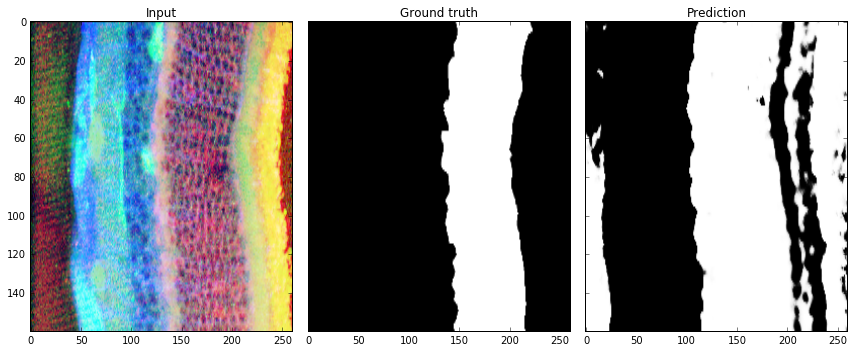

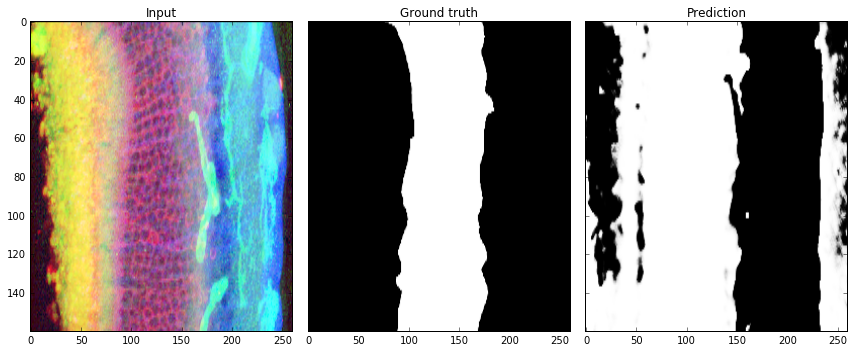

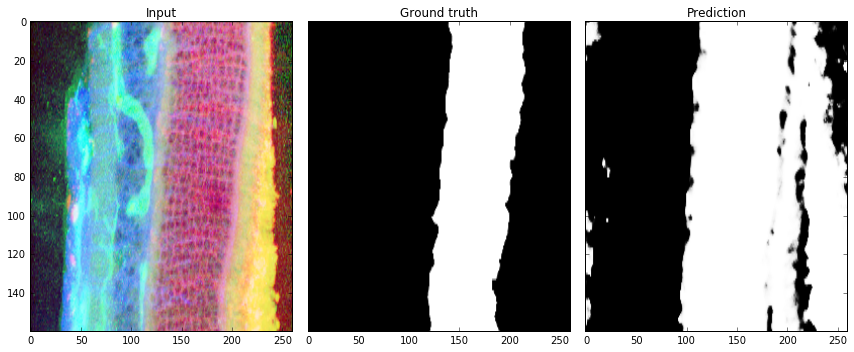

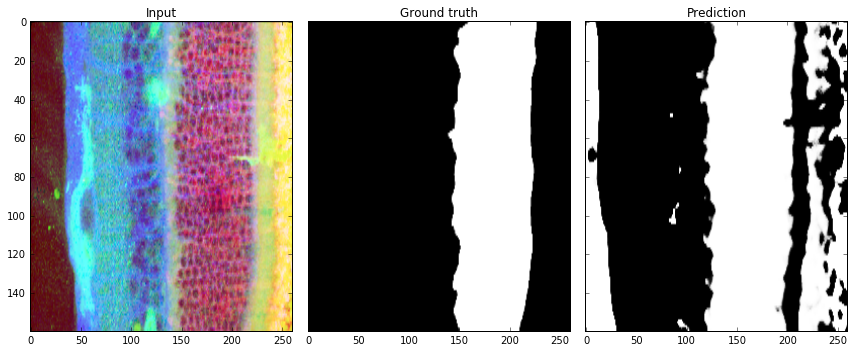

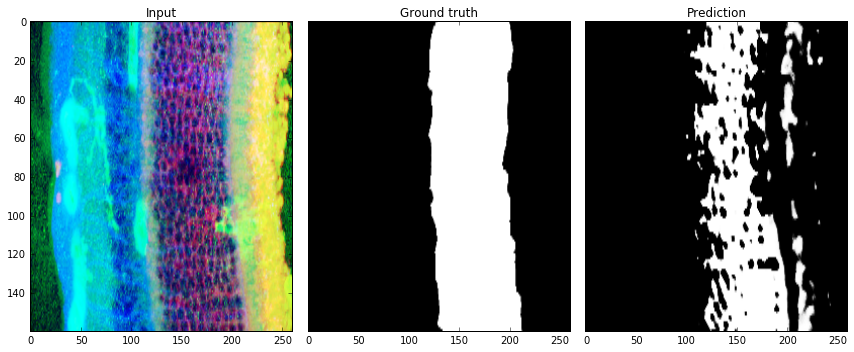

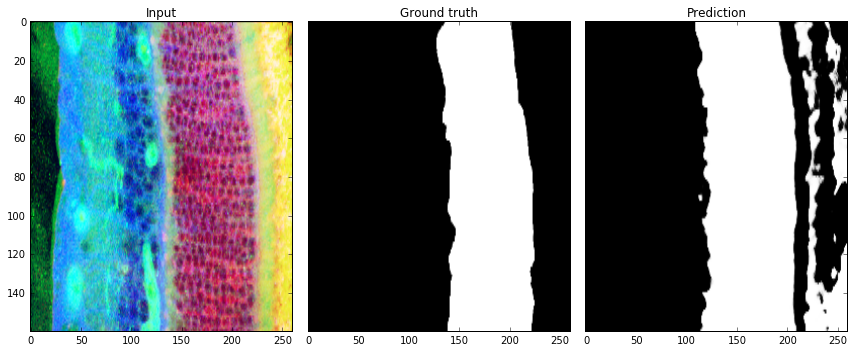

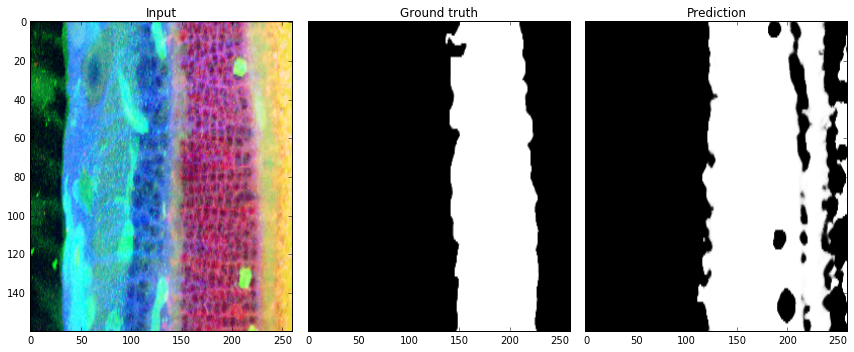

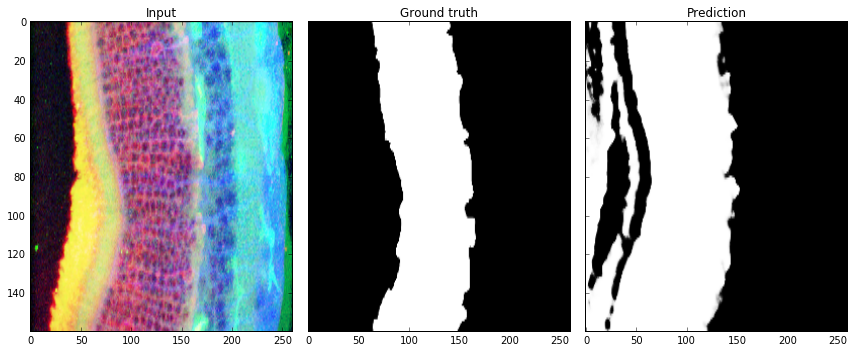

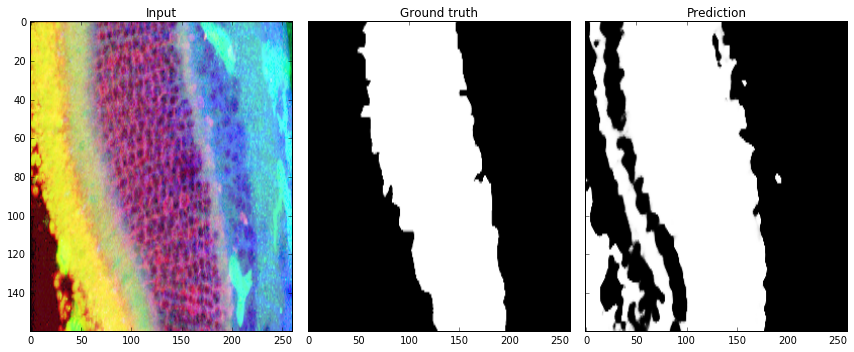

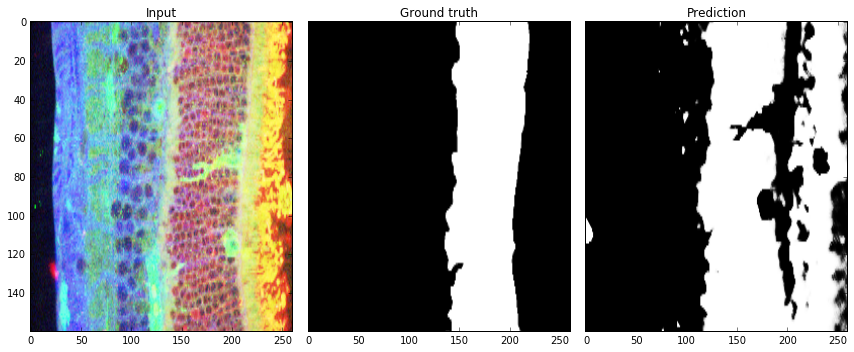

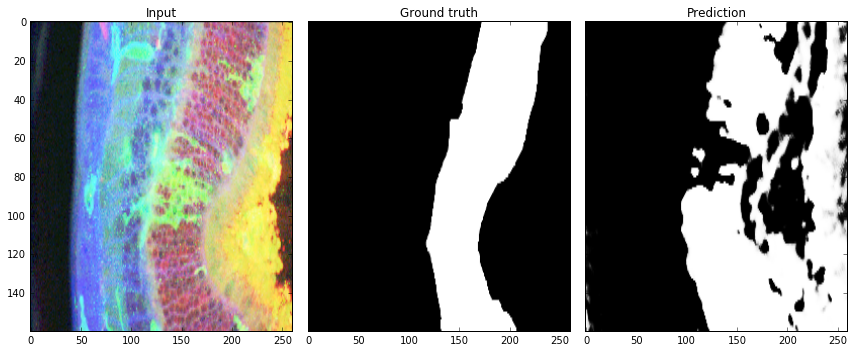

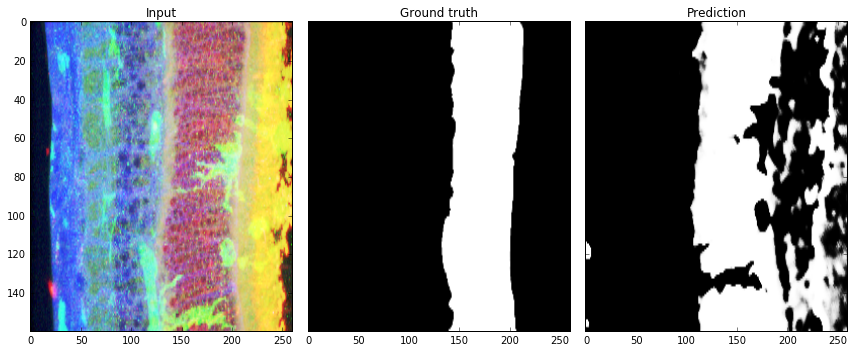

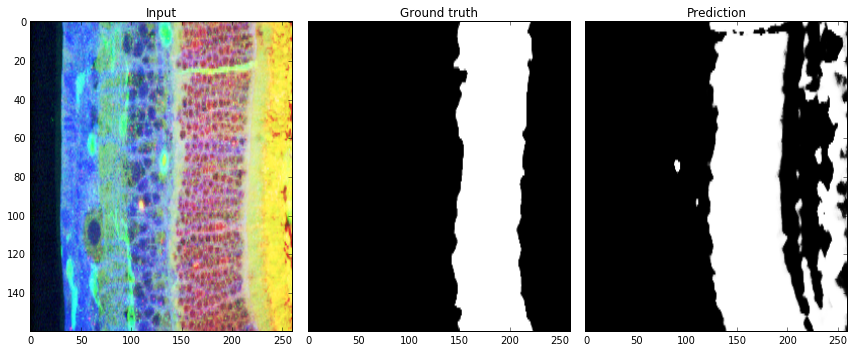

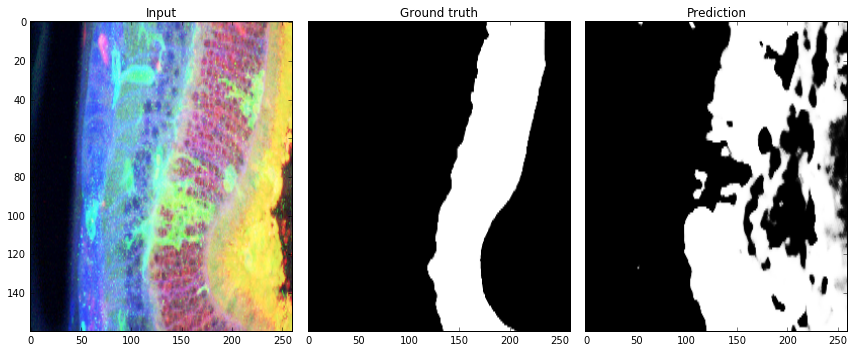

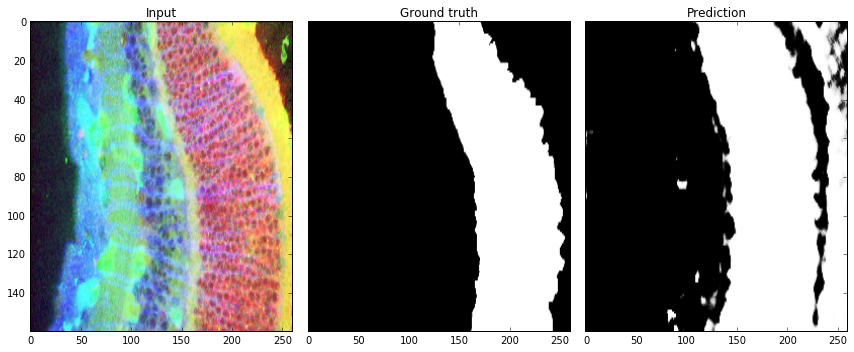

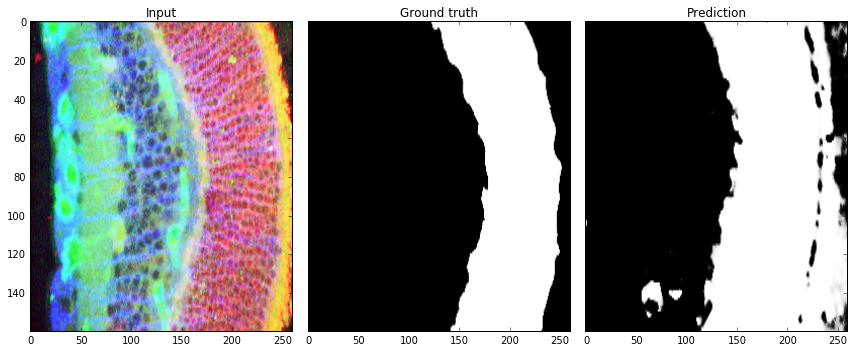

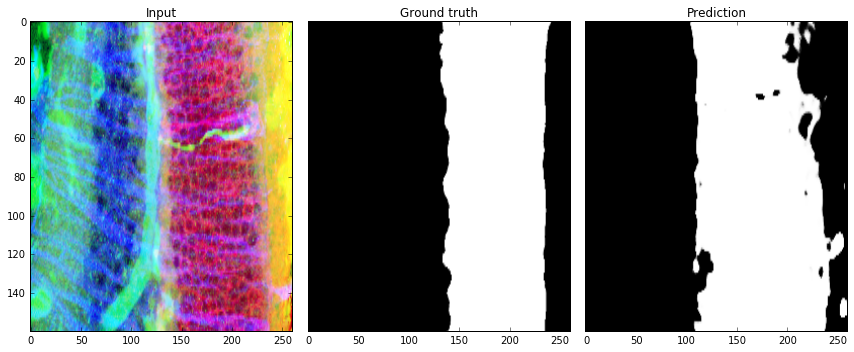

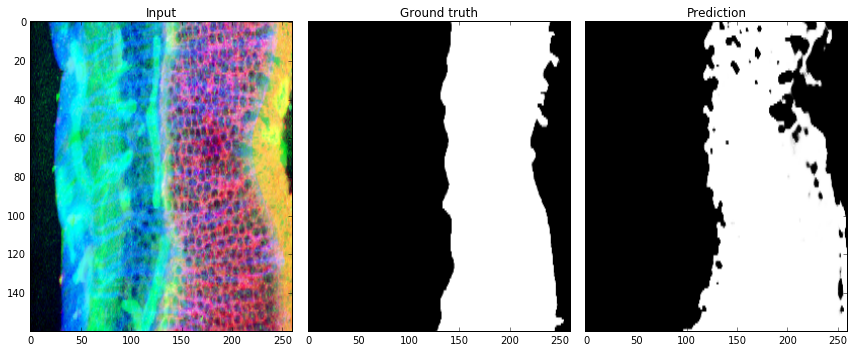

In [13]:
for p in range(0,prediction.shape[0]):
    fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
    ax[0].imshow(data[p,...,...], aspect="auto")
    ax[1].imshow(label[p,...,1], aspect="auto",cmap='gray')
    mask = prediction[p,...,1] # > 0.5
    ax[2].imshow(mask, aspect="auto",cmap='gray')
    ax[0].set_title("Input")
    ax[1].set_title("Ground truth")
    ax[2].set_title("Prediction")
    fig.tight_layout()
    fig.savefig(path_to_segmentation + "Retina-Segmentation/code/Predictions_Visualized/" + str(p) + ".png")
    fig.show()